In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import optimizers
import gc

In [2]:
# Get data
fashion_mnist = tf.keras.datasets.fashion_mnist
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

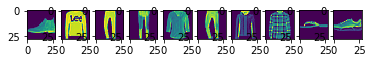

In [3]:
# Plot samples
f = plt.figure()
for i in range(10):
    f.add_subplot(1,10,i+1)
    plt.imshow(testX[i])


In [4]:
# Restrain pixels to 0~1
trainX = trainX / 255.0
testX  = testX / 255.0

In [ ]:
# Load or create model
if(os.path.isfile('./Fashion_nn_model.h5')):
    model = tf.keras.models.load_model("./Fashion_nn_model.h5")
else:
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    #tf.keras.layers.Dense(500, activation = 'sigmoid',kernel_regularizer = tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.5021 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3797 - acc: 0.8626
Epoch 3/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3388 - acc: 0.8756
Epoch 4/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3126 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.2937 - acc: 0.8913
10000/1 - 1s - loss: 0.2465 - acc: 0.8733
accuracy = 0.873300015926


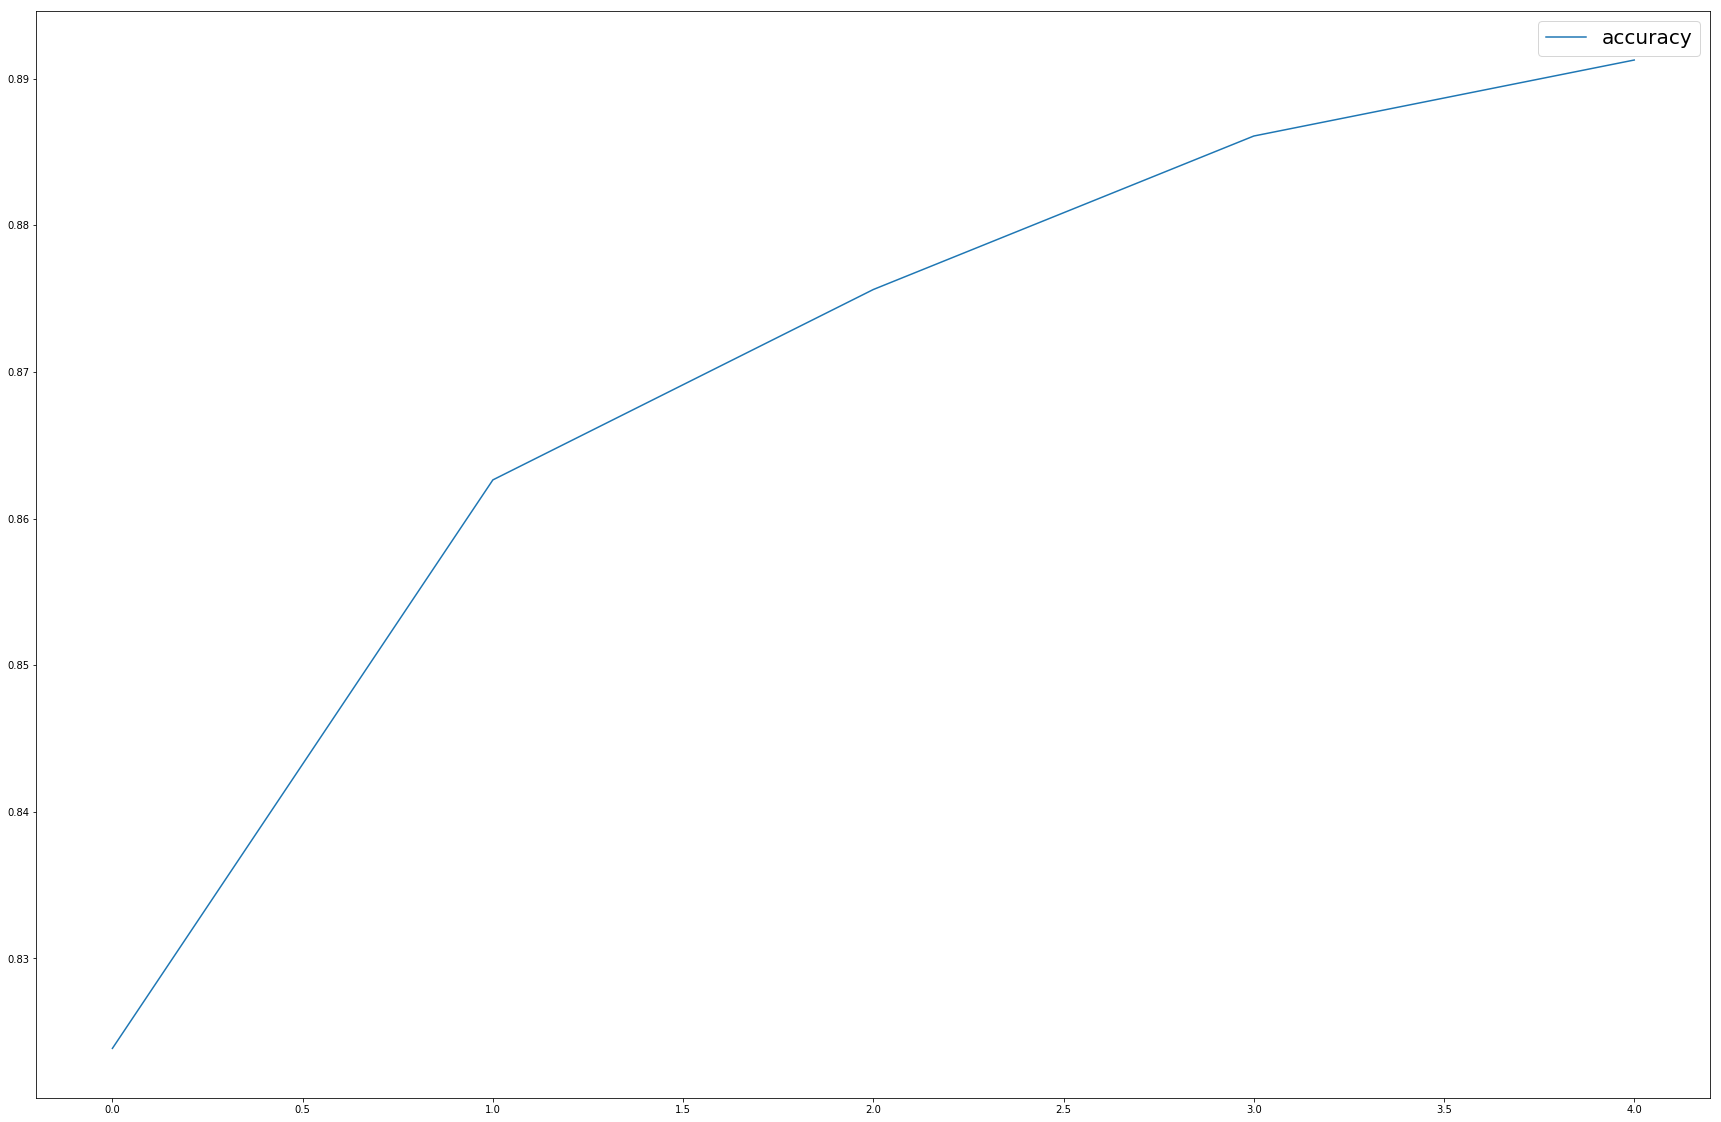

In [5]:
fig = plt.figure(figsize = (30,20))


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
acc = model.fit(trainX,trainY,epochs = 5, verbose = 1)
    
test_loss, test_acc = model.evaluate(testX,testY,verbose = 2)
plt.plot(acc.history['acc'],label = 'accuracy')
print("accuracy = {}".format(test_acc))
# release momory
gc.collect()
plt.legend(fontsize = 20)
fig.savefig('Fashion nn.png')

In [6]:
# Save nn model
model.save('Fashion_nn_model.h5')

In [8]:
# reshape data data must me 3 dimenshion
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)

In [ ]:
# Load or create model
if(os.path.isfile('./Fashion_cnn_model.h5')):
    model_cnn = tf.keras.models.load_model("./Fashion_cnn_model.h5")
else:
    model_cnn = tf.keras.models.Sequential([       
    tf.keras.layers.Conv2D(64, input_shape = (28,28,1), kernel_size = 2, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = [2,2]),    
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 136s 2ms/sample - loss: 0.3812 - acc: 0.8630
Epoch 2/5
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.2638 - acc: 0.9033
Epoch 3/5
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.2213 - acc: 0.9176
Epoch 4/5
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.1874 - acc: 0.9301
Epoch 5/5
60000/60000 [==============================] - 156s 3ms/sample - loss: 0.1611 - acc: 0.9404
10000/1 - 5s - loss: 0.2173 - acc: 0.9113
accuracy = 0.911300003529


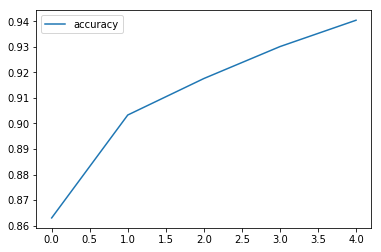

In [9]:
model_cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
acc = model_cnn.fit(trainX,trainY,epochs = 5,verbose = 1)
    
test_loss, test_acc = model_cnn.evaluate(testX,testY,verbose = 2)
plt.plot(acc.history['acc'],label = 'accuracy')
print("accuracy = {}".format(test_acc))
# release momory
gc.collect()
plt.legend()
fig.savefig('Fashion cnn.png')

In [10]:
# Save cnn model
model.save('Fashion_cnn_model.h5')